In [1]:
from superfv import AdvectionSolver, initial_conditions
from functools import partial
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def square(x, y, z, bounds=(0, 1)):
    return (bounds[1] - bounds[0]) * np.where(
        np.logical_and(np.abs(x - 0.5) < 0.25, np.abs(y - 0.5) < 0.25), 1, 0
    ) + bounds[0]


config = dict(
    ic=partial(initial_conditions.square, vx=1),
    ic_passives={"passive_square": partial(square, bounds=(0, 1))},
    nx=64,
    ny=1,
    nz=1,
)
timing = dict(T=1)


solver0 = AdvectionSolver(
    p=0,
    **config,
)
solver0.run(**timing)

solver3 = AdvectionSolver(
    p=3,
    **config,
)
solver3.run(**timing)

solver3sl = AdvectionSolver(
    p=3,
    ZS=True,
    CFL=1 / 20,
    **config,
)
solver3sl.run(1.0)

100%|██████████| 1.0/1 [00:00]                 
100%|██████████| 1.0/1 [00:00]                 
100%|██████████| 1.0/1.0 [00:05]                  


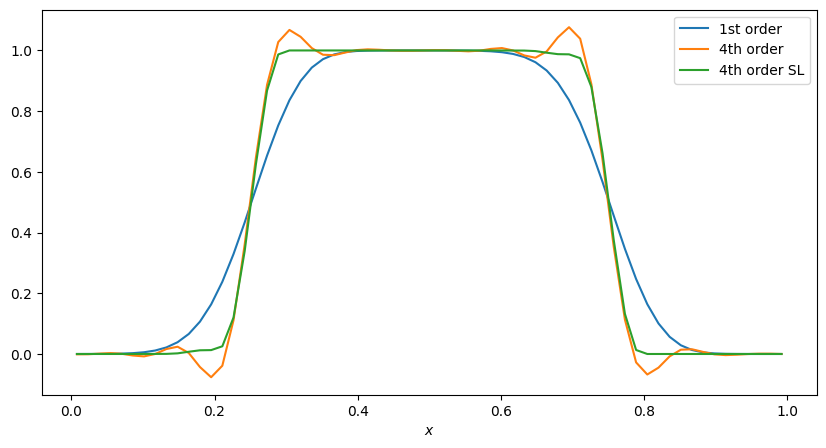

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
solver0.plot_1d_slice(ax, "rho", x=None, label="1st order")
solver3.plot_1d_slice(ax, "rho", x=None, label="4th order")
solver3sl.plot_1d_slice(ax, "rho", x=None, label="4th order SL")
ax.legend()

In [4]:
t = np.array(solver3sl.minisnapshots["t"])
mins = np.array(solver3sl.minisnapshots["min_rho"])
maxs = np.array(solver3sl.minisnapshots["max_rho"])

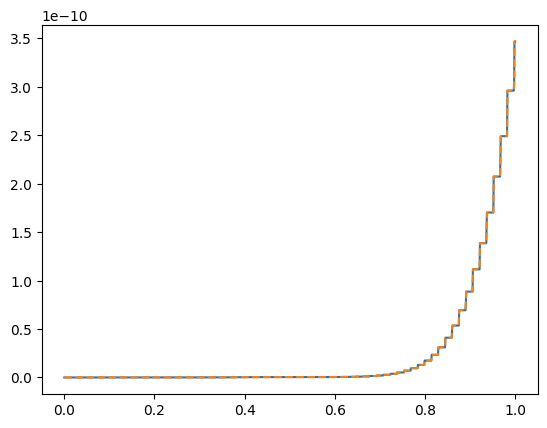

In [6]:
plt.plot(t, mins - 0)
plt.plot(t, 1 - maxs, "--")